# Plotting Sigmoid

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


$ S_{w,b}(x)=\frac{1}{1+e^-(wx+b)}$

In [10]:
def sigmoid(x,w,b):
  return 1/(1 + np.exp(-(w*x+b)))       

In [11]:
sigmoid(1,0.5,0)

0.6224593312018546

In [15]:
w=0.9
b=0.1
X=np.linspace(-10,10,100)
Y=sigmoid(X,w,b)

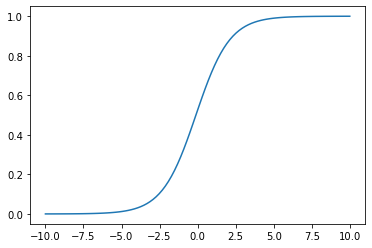

In [16]:
plt.plot(X,Y)
plt.show()

$ S_{w_1,w_2,b}(x_1,x_2)=\frac{1}{1+e^-(w_1x_1+w_2x_2+b)}$

In [17]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1 + np.exp(-(w1*x1+w2*x2+b))) 

In [19]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [22]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)

XX1,XX2=np.meshgrid(X1,X2)

print(X1.shape,X2.shape,XX1.shape,XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [24]:
w1=0.5
w2=0.5
b=0
Y=sigmoid_2d(XX1,XX2,w1,w2,b)

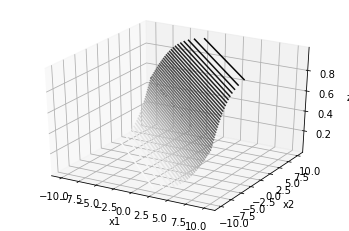

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');

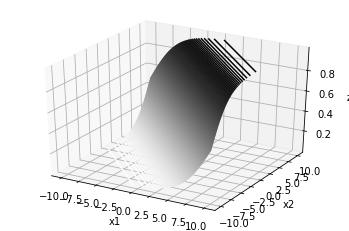

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 200, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');

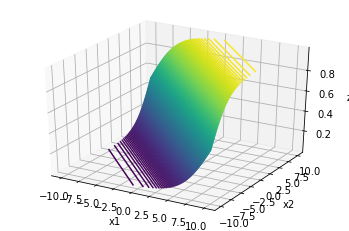

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 200, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');

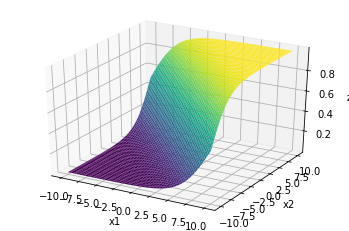

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');

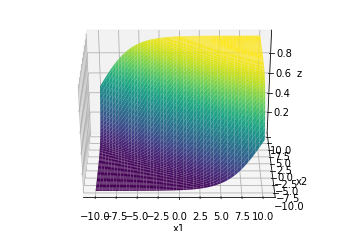

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');

ax.view_init(30,270)

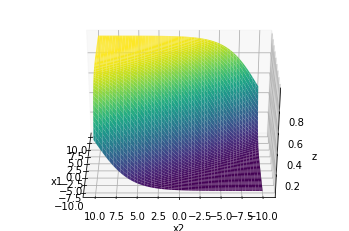

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');

ax.view_init(30,180)

In [34]:
w1=0.5
w2=2
Y=sigmoid_2d(XX1,XX2,w1,w2,b)

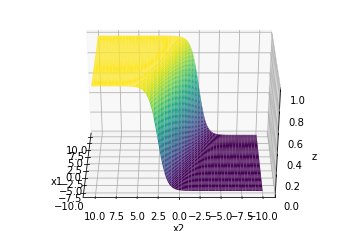

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');

ax.view_init(30,180)

# Compute loss for given data set

Loss can be considered as a metric which tells how good a model is. lower the loss better the model.

The parameters in this case w and b can take infinite number of values but we have to choose the ones which gives  least loss.  In this section it will be seen how the loss varies while we vary the values of the parameters.

To demonstrate the importance of loss function let start with a sigmoid function who's parameters are known beforehand.

In [40]:
w_unknown=0.5
b_unknown=0.25

X=np.random.random(25)*20-10
Y=sigmoid(X,w_unknown,b_unknown)

Now this is how the function looks like

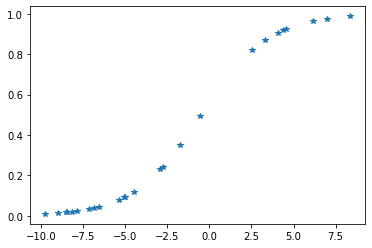

In [42]:
plt.plot(X,Y,'*')

Now let suppose we don't know the parameters w and b used to obtain this sigmoid function. our objective is to find the value of w and b such that the loss is minimum. In this case the loss will be least if we substitute the exact values
of w and b to which the curve was obtained

In [45]:
#  loss function
def calculate_loss(X,Y,w_est,b_est):
    loss=0
    for x,y in zip(X,Y):
        loss+=(y-sigmoid(x,w_est,b_est))**2
    return loss

Now that we have define the loss function, let's see how the loss varies with respect to parameters w and b.  What is speed purpose let's very w and b in  range -1 to +1

In [43]:
W=np.linspace(-1,1,100)

In [44]:
B=np.linspace(-1,1,100)

In [46]:
WW, BB=np.meshgrid(W,B)

In [47]:
Loss =np.zeros(WW.shape)

In [48]:
WW.shape

(100, 100)

In [49]:
for i in range(WW.shape[0]):
    for j in range (WW.shape[1]):
        Loss[i,j]=calculate_loss(X,Y,WW[i,j],BB[i,j])

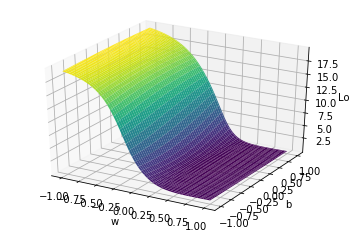

In [53]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

#ax.view_init(30,180)

It can be clearly seen that a negative value of w gives more loss

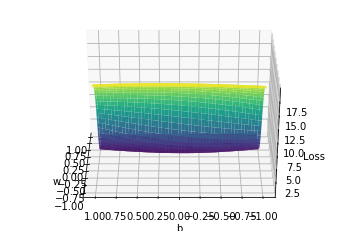

In [56]:
W=np.linspace(0,2,100)

for i in range(WW.shape[0]):
    for j in range (WW.shape[1]):
        Loss[i,j]=calculate_loss(X,Y,WW[i,j],BB[i,j])
        
        
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

ax.view_init(30,180)

In [58]:
ij=np.argmin(Loss)
i=int(np.floor(ij/Loss.shape[1]))
j=int(ij-i*Loss.shape[1])

In [59]:
print(i,j)

62 74


In [60]:
print(WW[i,j],BB[i,j])

0.49494949494949503 0.2525252525252526


So it can be seen that the loss is minimum at those values of w and b which are closer to the actual parameters through which the curve was obtained .